In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('uber.csv')
df.head()

,Unnamed: 0,key,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count
0,24238194,2015-05-07 19:52:06.0000003,7.5,2015-05-07 19:52:06 UTC,-73.999817,40.738354,-73.999512,40.723217,1
1,27835199,2009-07-17 20:04:56.0000002,7.7,2009-07-17 20:04:56 UTC,-73.994355,40.728225,-73.994710,40.750325,1
2,44984355,2009-08-24 21:45:00.00000061,12.9,2009-08-24 21:45:00 UTC,-74.005043,40.740770,-73.962565,40.772647,1
3,25894730,2009-06-26 08:22:21.0000001,5.3,2009-06-26 08:22:21 UTC,-73.976124,40.790844,-73.965316,40.803349,3
4,17610152,2014-08-28 17:47:00.000000188,16.0,2014-08-28 17:47:00 UTC,-73.925023,40.744085,-73.973082,40.761247,5


In [3]:
df.drop(['Unnamed: 0', 'key'], axis=1, inplace=True)

In [4]:
df.head()

,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count
0,7.5,2015-05-07 19:52:06 UTC,-73.999817,40.738354,-73.999512,40.723217,1
1,7.7,2009-07-17 20:04:56 UTC,-73.994355,40.728225,-73.994710,40.750325,1
2,12.9,2009-08-24 21:45:00 UTC,-74.005043,40.740770,-73.962565,40.772647,1
3,5.3,2009-06-26 08:22:21 UTC,-73.976124,40.790844,-73.965316,40.803349,3
4,16.0,2014-08-28 17:47:00 UTC,-73.925023,40.744085,-73.973082,40.761247,5


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200000 entries, 0 to 199999
Data columns (total 7 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   fare_amount        200000 non-null  float64
 1   pickup_datetime    200000 non-null  object 
 2   pickup_longitude   200000 non-null  float64
 3   pickup_latitude    200000 non-null  float64
 4   dropoff_longitude  199999 non-null  float64
 5   dropoff_latitude   199999 non-null  float64
 6   passenger_count    200000 non-null  int64  
dtypes: float64(5), int64(1), object(1)
memory usage: 10.7+ MB


In [6]:
df.passenger_count.value_counts()

passenger_count
1      138425
2       29428
5       14009
3        8881
4        4276
6        4271
0         709
208         1
Name: count, dtype: int64

In [7]:
df = df[~ (df.passenger_count == 0) & ~(df.passenger_count == 208)]

In [8]:
df.shape

(199290, 7)

In [9]:
df.isnull().sum()

fare_amount          0
pickup_datetime      0
pickup_longitude     0
pickup_latitude      0
dropoff_longitude    0
dropoff_latitude     0
passenger_count      0
dtype: int64

## Handle Range of latitude and longitude

In [10]:
df = df[
    (df.pickup_longitude < 180) & (df.pickup_longitude > -180) &
    (df.dropoff_longitude < 180) & (df.dropoff_longitude > -180) &
    (df.pickup_latitude < 90) & (df.pickup_latitude > -90) &
    (df.dropoff_latitude < 90) & (df.dropoff_latitude > -90)
]

In [11]:
df.shape

(199278, 7)

In [12]:
df['pickup_datetime'] = pd.to_datetime(df['pickup_datetime'])

In [13]:
df['year'] = df['pickup_datetime'].dt.year
df['month'] = df['pickup_datetime'].dt.month
df['day'] = df['pickup_datetime'].dt.day
df['hour'] = df['pickup_datetime'].dt.hour

In [14]:
df.head()

,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,year,month,day,hour
0,7.5,2015-05-07 19:52:06+00:00,-73.999817,40.738354,-73.999512,40.723217,1,2015,5,7,19
1,7.7,2009-07-17 20:04:56+00:00,-73.994355,40.728225,-73.994710,40.750325,1,2009,7,17,20
2,12.9,2009-08-24 21:45:00+00:00,-74.005043,40.740770,-73.962565,40.772647,1,2009,8,24,21
3,5.3,2009-06-26 08:22:21+00:00,-73.976124,40.790844,-73.965316,40.803349,3,2009,6,26,8
4,16.0,2014-08-28 17:47:00+00:00,-73.925023,40.744085,-73.973082,40.761247,5,2014,8,28,17


In [15]:
df.drop(['pickup_datetime'], axis=1, inplace=True)

In [16]:
df.head()

,fare_amount,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,year,month,day,hour
0,7.5,-73.999817,40.738354,-73.999512,40.723217,1,2015,5,7,19
1,7.7,-73.994355,40.728225,-73.994710,40.750325,1,2009,7,17,20
2,12.9,-74.005043,40.740770,-73.962565,40.772647,1,2009,8,24,21
3,5.3,-73.976124,40.790844,-73.965316,40.803349,3,2009,6,26,8
4,16.0,-73.925023,40.744085,-73.973082,40.761247,5,2014,8,28,17


In [17]:
df.duplicated().sum()

3

In [18]:
df.drop_duplicates(inplace=True)

## Haversine distance

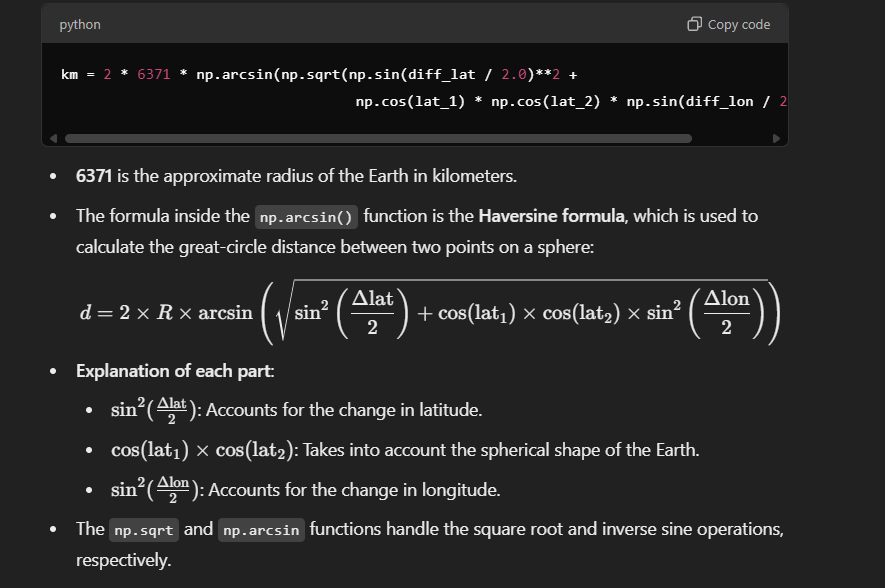

In [19]:
def haversine_distance(lon_1, lon_2, lat_1, lat_2):
    
    lon_1, lon_2, lat_1, lat_2 = map(np.radians, [lon_1, lon_2, lat_1, lat_2])  #Degrees to Radians
    
    
    diff_lon = lon_2 - lon_1
    diff_lat = lat_2 - lat_1
    

    km = 2 * 6371 * np.arcsin(
        np.sqrt(np.sin(diff_lat/2.0)**2 + np.cos(lat_1) * np.cos(lat_2) * np.sin(diff_lon/2.0)**2)
    )
    
    return km

In [20]:
df['haversine_distance'] = haversine_distance(df['pickup_longitude'],df['dropoff_longitude'], df['pickup_latitude'],df['dropoff_latitude'])
df.head()

,fare_amount,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,year,month,day,hour,haversine_distance
0,7.5,-73.999817,40.738354,-73.999512,40.723217,1,2015,5,7,19,1.683323
1,7.7,-73.994355,40.728225,-73.994710,40.750325,1,2009,7,17,20,2.457590
2,12.9,-74.005043,40.740770,-73.962565,40.772647,1,2009,8,24,21,5.036377
3,5.3,-73.976124,40.790844,-73.965316,40.803349,3,2009,6,26,8,1.661683
4,16.0,-73.925023,40.744085,-73.973082,40.761247,5,2014,8,28,17,4.475450


## Handling Outliers

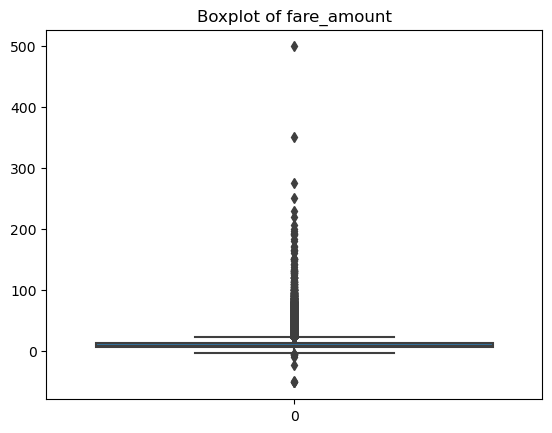

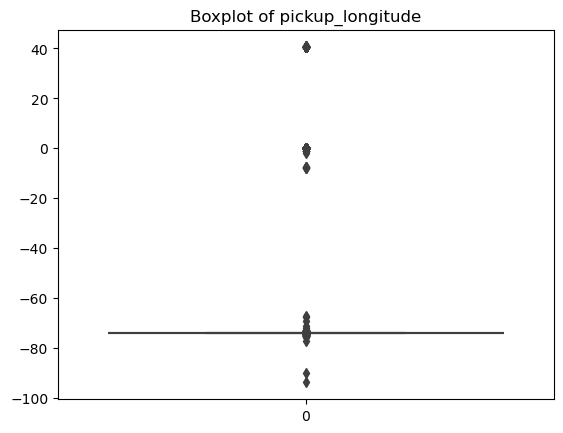

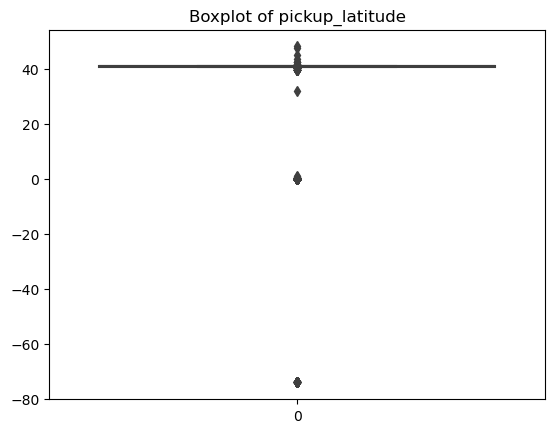

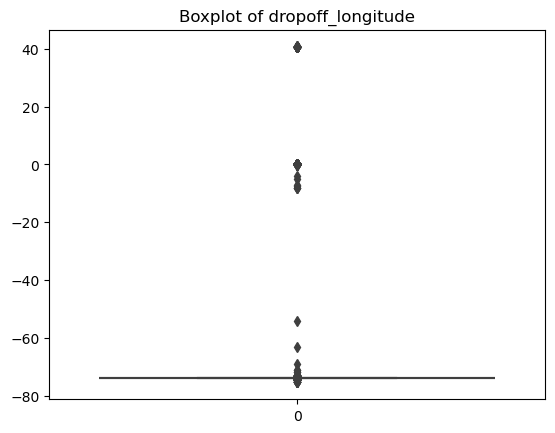

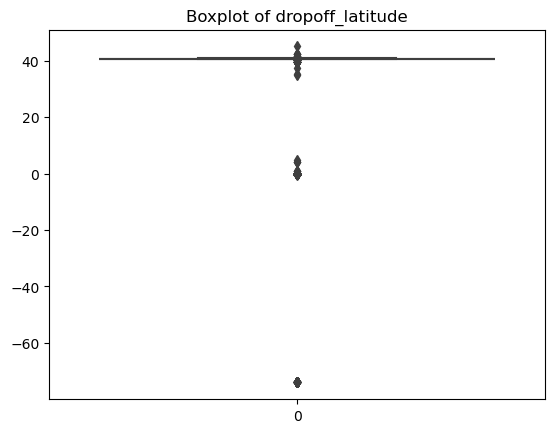

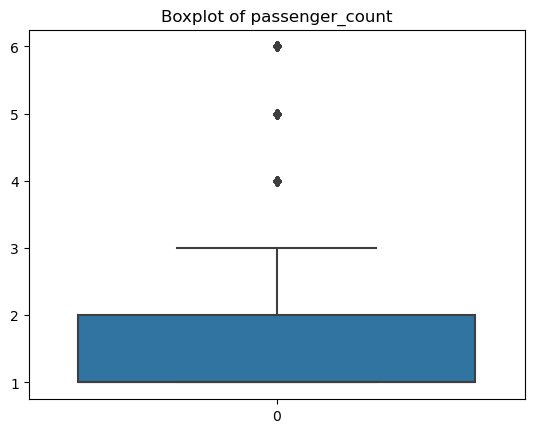

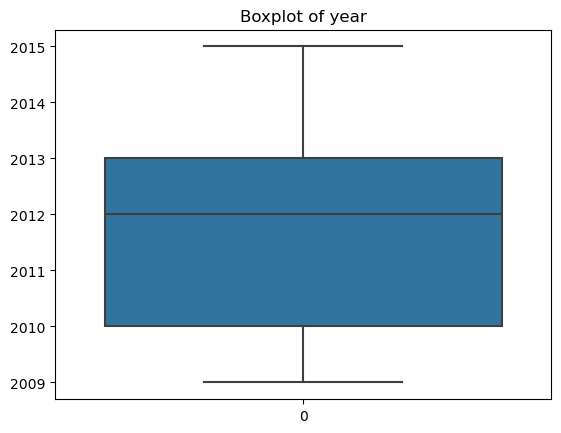

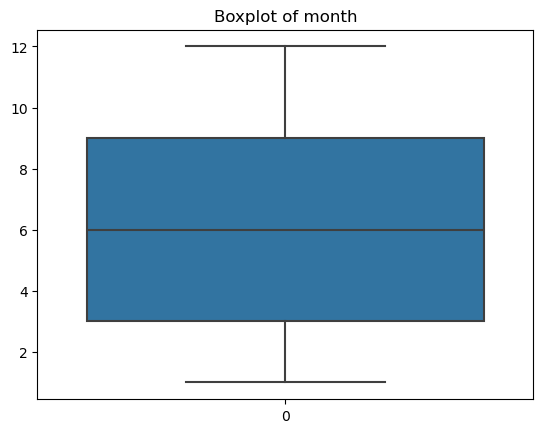

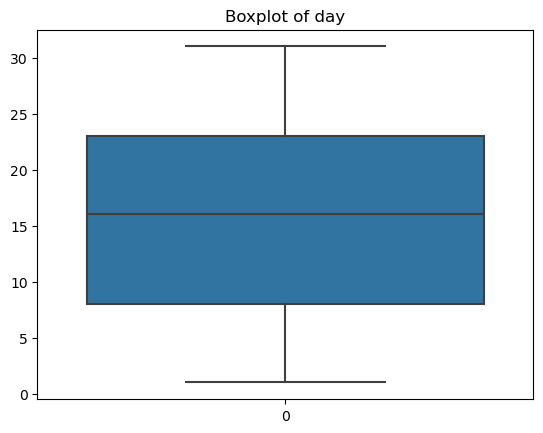

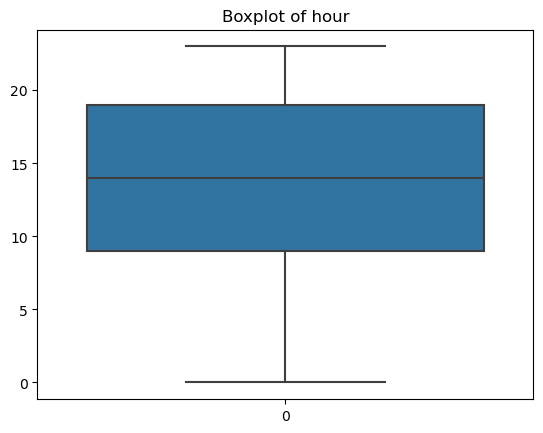

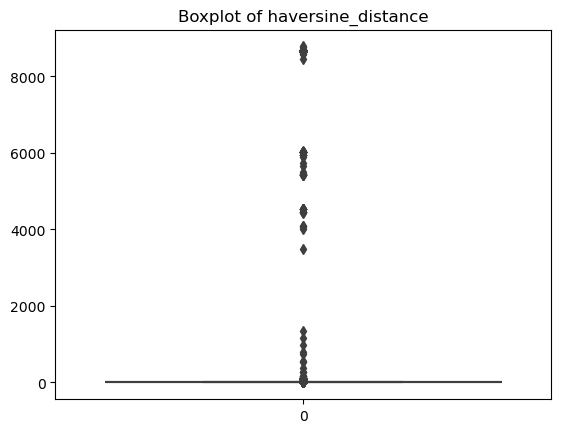

In [21]:
numerical_cols = [col for col in df.columns if df[col].dtype != 'object']

for col in numerical_cols:
    sns.boxplot(df[col])
    plt.title(f'Boxplot of {col}')
    plt.show()

In [22]:
numerical_cols = [col for col in df.columns if df[col].dtype != 'object']

def remove_outliers(df, cols):
    for col in cols:
        Q1 = df[col].quantile(0.25)
        Q3 = df[col].quantile(0.75)
        IQR = Q3 - Q1
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR
        # Filter the DataFrame to remove outliers
        df = df[(df[col] >= lower_bound) & (df[col] <= upper_bound)]
    return df

df_clean = remove_outliers(df, numerical_cols)

In [23]:
df_clean.shape

(141501, 11)

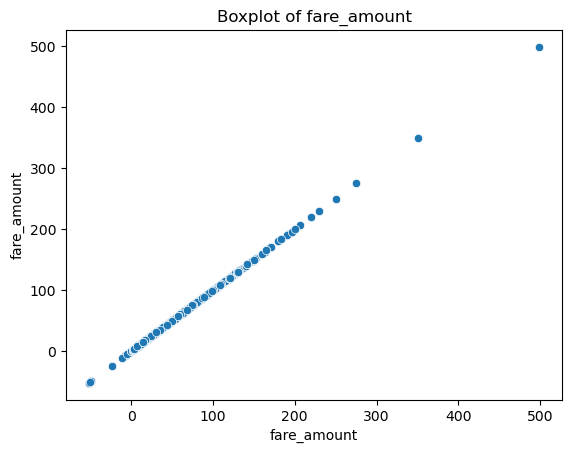

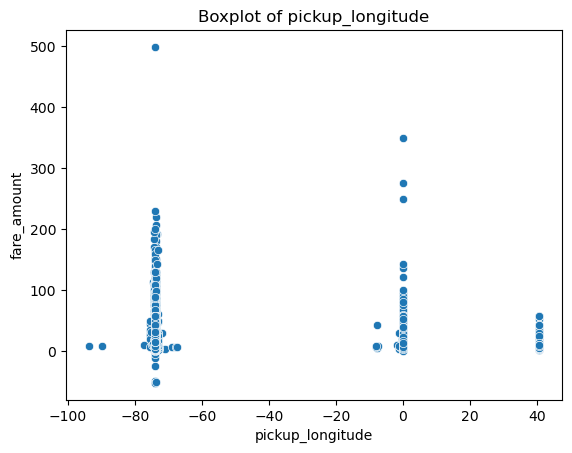

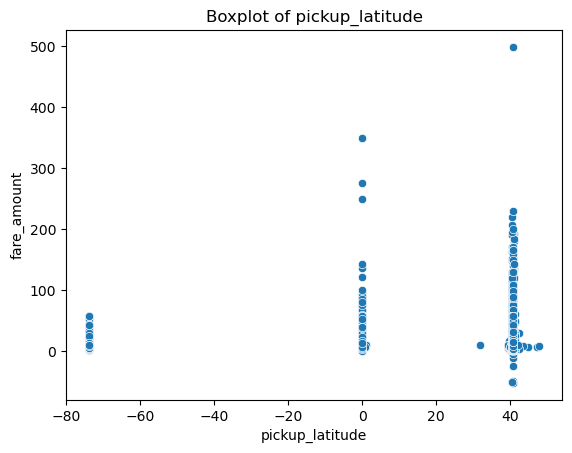

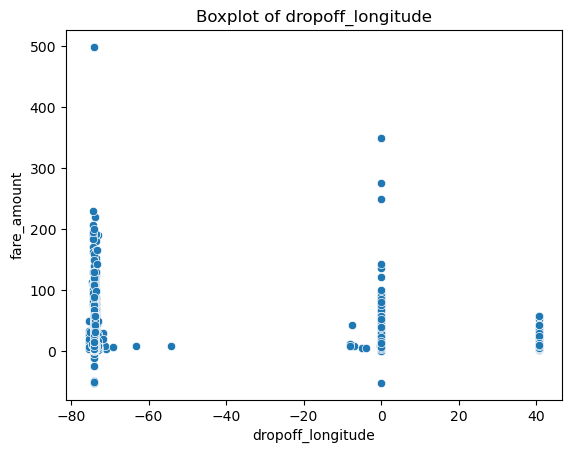

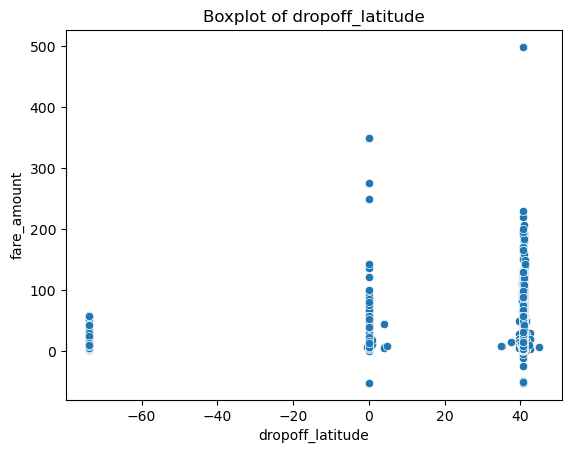

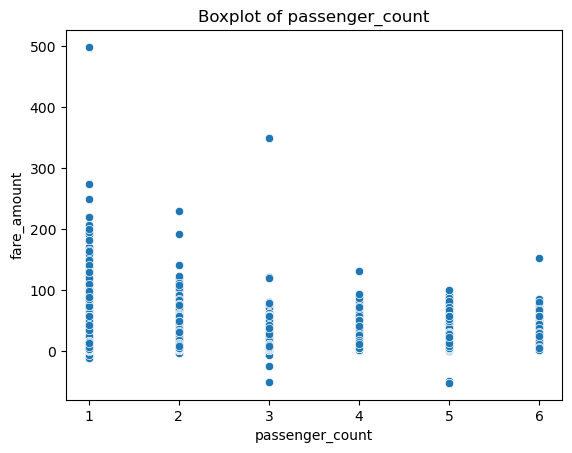

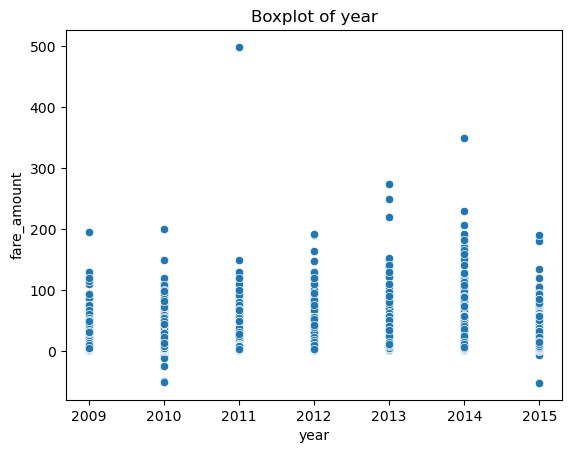

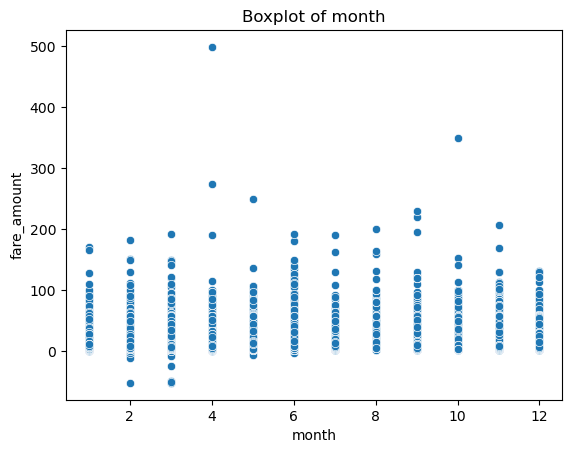

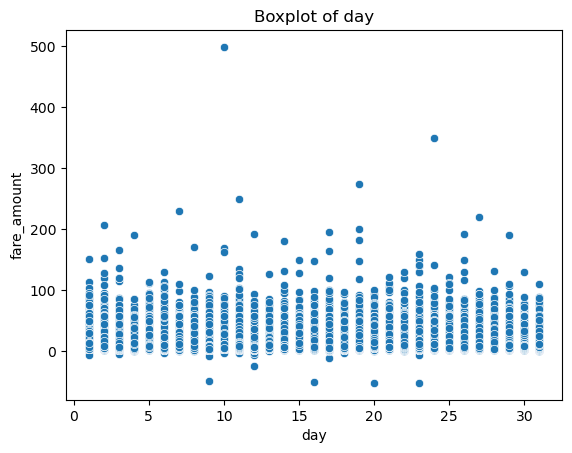

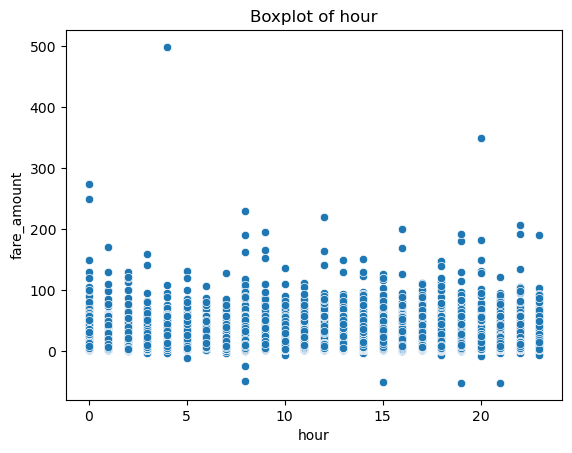

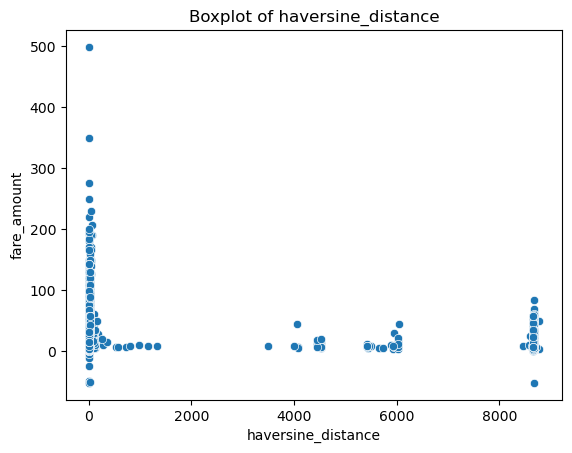

In [24]:
for col in numerical_cols:
    sns.scatterplot(x=df[col], y=df['fare_amount'])
    plt.title(f'Boxplot of {col}')
    plt.show()

(0.0, 100.0)

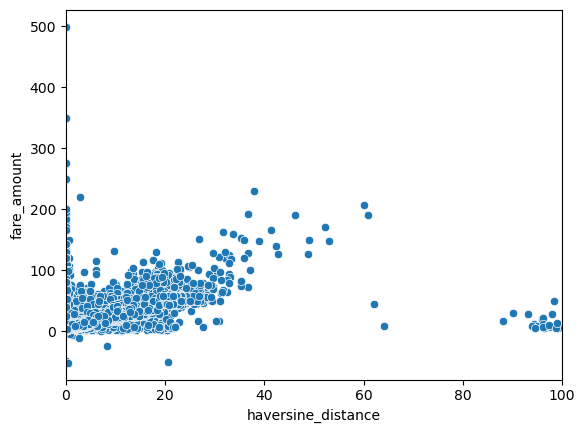

In [25]:
sns.scatterplot(x=df['haversine_distance'], y=df['fare_amount'])
plt.xlim([0, 100])

In [26]:
df = df[~(df['haversine_distance'] == 0)]

<Axes: >

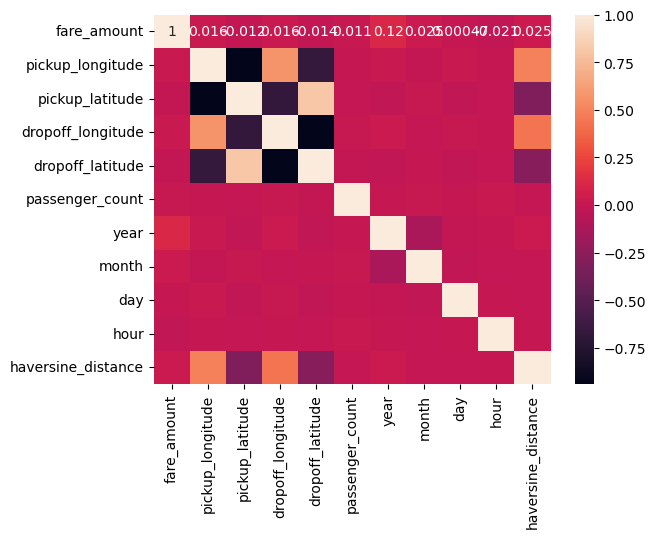

In [28]:
sns.heatmap(df.corr(),annot=True)

In [35]:
Y = df.iloc[:,:1]
X = df.iloc[:,1:]

In [36]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.20, random_state=42)

## Linear Regression

In [37]:
from sklearn.linear_model import LinearRegression

lr = LinearRegression()
lr.fit(X_train, y_train)

LinearRegression()

In [38]:
y_pred = lr.predict(X_test)

In [43]:
from sklearn.metrics import r2_score

print('R2 score : ',r2_score(y_test, y_pred))

R2 score :  0.01693801316532917


In [44]:
from sklearn.ensemble import RandomForestRegressor

In [45]:
rf = RandomForestRegressor(n_estimators=10)
rf.fit(X_train, y_train)

C:\Users\siddharth\AppData\Local\Temp\ipykernel_15988\41803763.py:2: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rf.fit(X_train, y_train)


RandomForestRegressor(n_estimators=10)

In [46]:
rf_pred = rf.predict(X_test)

# Random Forest Evaluation
print('R2 score : ',r2_score(y_test, rf_pred))

R2 score :  0.8212039326545694


The Random Forest Regressor is an ensemble learning method used for regression tasks. It builds multiple decision trees and merges their results to improve accuracy and robustness. This technique is based on the Random Forest algorithm, which can handle both regression and classification tasks.

## How Random Forest Regressor Works:
Bootstrapping and Random Sampling:

The Random Forest algorithm uses a technique called bootstrap aggregating (or bagging).
It generates multiple subsets (bootstrapped samples) of the original dataset by randomly sampling data points with replacement.
Each of these subsets is used to train an individual decision tree.
Feature Randomness (Feature Bagging):

When training each decision tree, the Random Forest selects a random subset of features for splitting nodes rather than considering all available features.
This technique, known as feature bagging, introduces additional randomness, making the trees less correlated with each other and reducing the chance of overfitting.
Building Multiple Decision Trees:

Each decision tree in the forest is trained independently on its own bootstrapped dataset.
The trees grow to their full depth, meaning they are not pruned, leading to deep trees that may have high variance individually.
Making Predictions (Aggregation):

For regression tasks, the Random Forest Regressor aggregates the predictions from all individual decision trees.
The final prediction is computed as the average of all the predictions made by the individual trees.
Prediction

 
By averaging the results, the Random Forest reduces the variance of individual trees, leading to more stable and accurate predictions.

### Advantages of Random Forest Regressor:
Reduces Overfitting: By averaging multiple trees, it reduces overfitting compared to a single decision tree.
Handles Non-linearity: It can model complex relationships and non-linear patterns in the data.
Feature Importance: Provides estimates of feature importance, which can be helpful for feature selection.
Robust to Noise: It is less sensitive to noisy data due to its ensemble nature.

### Disadvantages:
Less Interpretability: While decision trees are easy to interpret, a forest of trees is more like a "black box."
Requires More Computation: Training and predicting with multiple trees can be computationally expensive, especially for large datasets.